In [4]:
import pandas as pd
from pymongo import MongoClient
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import ast

## Create DataFrames from first quarter to third quarter
- First quarter, Q1: January – March (90 days or 91 days in leap years)

- Second quarter, Q2: April – June (91 days)

- Third quarter, Q3: July – September (92 days)

In [5]:
df_train = pd.read_csv(r"Resources\cleaned_data.csv")

In [6]:
# Filter for the months January to March
q1 = df_train[df_train['month'].isin(['January', 'February', 'March'])]

# Display the filtered DataFrame
q1.head()

,customer_id,month,name,age,occupation,annual_income,num_bank_accounts,num_of_loans,type_of_loans,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
2,CUS_0x21b1,January,Rick Rothackerj,28,NaN,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,24.46,26 Years and 7 Months,No,18.82,104.29,Low_spent_Small_value_payments,470.69,Standard
3,CUS_0x21b1,February,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,7,...,Good,605.03,38.55,26 Years and 8 Months,No,18.82,40.39,High_spent_Large_value_payments,484.59,Good
9,CUS_0x2dbc,February,Langep,35,Engineer,143162.64,1,3,"Auto Loan, Auto Loan, and Not Specified",13,...,Good,1303.01,41.70,17 Years and 10 Months,No,246.99,232.86,High_spent_Small_value_payments,998.87,Good
14,CUS_0xb891,January,Jasond,55,Entrepreneur,30689.89,2,1,Not Specified,0,...,Good,632.46,26.54,17 Years and 3 Months,No,16.42,81.23,Low_spent_Large_value_payments,433.60,Standard
15,CUS_0xb891,February,Jasond,55,Entrepreneur,30689.89,2,1,Not Specified,5,...,Good,632.46,35.28,17 Years and 4 Months,No,16.42,124.88,Low_spent_Small_value_payments,409.95,Standard


In [7]:
q2 = df_train[df_train['month'].isin(['April', 'May', 'June'])]
q2.head()

,customer_id,month,name,age,occupation,annual_income,num_bank_accounts,num_of_loans,type_of_loans,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,April,Aaron Maashoh,24,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good
4,CUS_0x21b1,April,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,39.18,26 Years and 10 Months,No,18.82,99.31,Low_spent_Medium_value_payments,465.68,Good
5,CUS_0x21b1,May,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,34.98,26 Years and 11 Months,No,18.82,130.12,Low_spent_Small_value_payments,444.87,Good
6,CUS_0x21b1,June,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,33.38,27 Years and 0 Months,No,18.82,43.48,High_spent_Large_value_payments,481.51,Good
10,CUS_0x2dbc,May,Langep,35,NaN,143162.64,1,3,"Auto Loan, Auto Loan, and Not Specified",10,...,Good,1303.01,31.38,18 Years and 1 Months,No,246.99,430.95,Low_spent_Large_value_payments,810.78,Good


In [8]:
q3 = df_train[df_train['month'].isin(['July', 'August', 'September'])]
q3.head()

,customer_id,month,name,age,occupation,annual_income,num_bank_accounts,num_of_loans,type_of_loans,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
1,CUS_0xd40,July,Aaron Maashoh,24,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.54,22 Years and 7 Months,No,49.57,178.34,Low_spent_Small_value_payments,244.57,Good
7,CUS_0x21b1,July,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,31.13,27 Years and 1 Months,NM,18.82,70.10,High_spent_Medium_value_payments,464.88,Good
8,CUS_0x21b1,August,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,32.93,27 Years and 2 Months,No,18.82,218.90,Low_spent_Small_value_payments,356.08,Good
12,CUS_0x2dbc,July,Langep,35,Engineer,143162.64,1,3,"Auto Loan, Auto Loan, and Not Specified",8,...,Good,1303.01,38.07,18 Years and 3 Months,No,246.99,263.17,High_spent_Small_value_payments,968.56,Standard
13,CUS_0x2dbc,August,Langep,35,Engineer,143162.64,1,3,"Auto Loan, Auto Loan, and Not Specified",8,...,Good,1303.01,38.37,18 Years and 4 Months,No,246.99,10000.00,High_spent_Small_value_payments,895.49,Standard


Fourth quarter info

In [9]:
q4 = df_train[df_train['month'].isin(['October', 'November', 'December'])]
q4.head()

,customer_id,month,name,age,occupation,annual_income,num_bank_accounts,num_of_loans,type_of_loans,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score


In [10]:
# Check if 'October' is in the 'month' column
has_december = 'October' in df_train['month'].values

# Print the result
if has_december:
    print("The CSV file contains October.")
else:
    print("The CSV file does not contain October.")

The CSV file does not contain October.


In [11]:
# Check if 'November' is in the 'month' column
has_december = 'November' in df_train['month'].values

# Print the result
if has_december:
    print("The CSV file contains November.")
else:
    print("The CSV file does not contain November.")

The CSV file does not contain November.


In [12]:
# Check if 'December' is in the 'month' column
has_december = 'October' in df_train['month'].values

# Print the result
if has_december:
    print("The CSV file contains December.")
else:
    print("The CSV file does not contain December.")

The CSV file does not contain December.


---------------------------------------

In [13]:
# Save cleaned dataframe

q1.to_csv("Resources\q1.csv", index = False)
q2.to_csv("Resources\q2.csv", index = False)
q3.to_csv("Resources\q3.csv", index = False)

<>:3: SyntaxWarning: invalid escape sequence '\q'
<>:4: SyntaxWarning: invalid escape sequence '\q'
<>:5: SyntaxWarning: invalid escape sequence '\q'
<>:3: SyntaxWarning: invalid escape sequence '\q'
<>:4: SyntaxWarning: invalid escape sequence '\q'
<>:5: SyntaxWarning: invalid escape sequence '\q'
C:\Users\Jennifer\AppData\Local\Temp\ipykernel_29468\1879447033.py:3: SyntaxWarning: invalid escape sequence '\q'
  q1.to_csv("Resources\q1.csv", index = False)
C:\Users\Jennifer\AppData\Local\Temp\ipykernel_29468\1879447033.py:4: SyntaxWarning: invalid escape sequence '\q'
  q2.to_csv("Resources\q2.csv", index = False)
C:\Users\Jennifer\AppData\Local\Temp\ipykernel_29468\1879447033.py:5: SyntaxWarning: invalid escape sequence '\q'
  q3.to_csv("Resources\q3.csv", index = False)


# Quarterly Report Analysis

Outstanding Debt Data

In [14]:
# Group by customer_id and calculate the max and min outstanding_debt
debt_difference = q1.groupby('customer_id')['outstanding_debt'].agg(['max', 'min'])
debt_difference['difference'] = debt_difference['max'] - debt_difference['min']
q1_outstanding_debt = debt_difference
q1_outstanding_debt.head()

,max,min,difference
customer_id,,,
CUS_0x1000,1562.91,1562.91,0.0
CUS_0x1009,202.68,202.68,0.0
CUS_0x1011,473.14,473.14,0.0
CUS_0x1013,1233.51,1233.51,0.0
CUS_0x1018,2773.09,2773.09,0.0


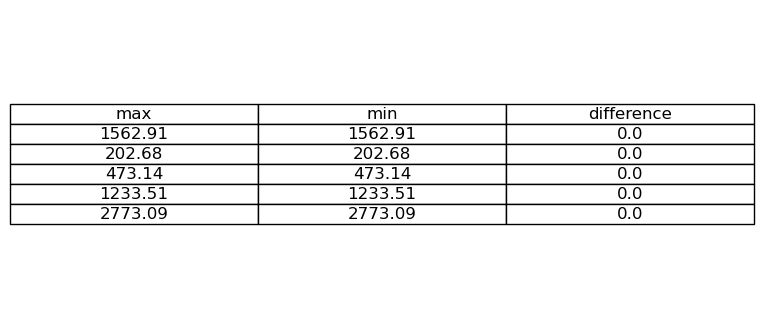

In [15]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size as needed

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=q1_outstanding_debt.head().values,
                 colLabels=q1_outstanding_debt.columns,
                 cellLoc='center',
                 loc='center')

# Adjust font size and formatting
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale the table

# Save the figure as a PNG file
plt.savefig('q1_outstanding_debt.png', bbox_inches='tight', dpi=300)

# Optionally, show the plot
plt.show()


In [16]:
# Group by customer_id and calculate the max and min outstanding_debt
debt_difference = q2.groupby('customer_id')['outstanding_debt'].agg(['max', 'min'])
debt_difference['difference'] = debt_difference['max'] - debt_difference['min']
q2_outstanding_debt = debt_difference
q2_outstanding_debt.head()

,max,min,difference
customer_id,,,
CUS_0x1000,1562.91,1562.91,0.0
CUS_0x1011,473.14,473.14,0.0
CUS_0x1013,1233.51,1233.51,0.0
CUS_0x1026,849.69,849.69,0.0
CUS_0x102d,648.36,648.36,0.0


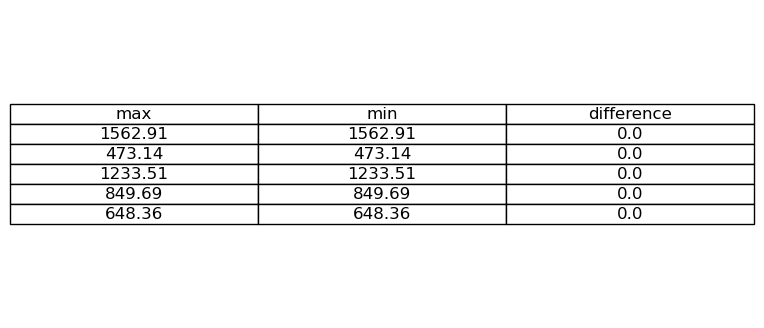

In [17]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size as needed

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=q2_outstanding_debt.head().values,
                 colLabels=q2_outstanding_debt.columns,
                 cellLoc='center',
                 loc='center')

# Adjust font size and formatting
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale the table

# Save the figure as a PNG file
plt.savefig('q2_outstanding_debt.png', bbox_inches='tight', dpi=300)

# Optionally, show the plot
plt.show()


In [18]:
# Group by customer_id and calculate the max and min outstanding_debt
debt_difference = q3.groupby('customer_id')['outstanding_debt'].agg(['max', 'min'])
debt_difference['difference'] = debt_difference['max'] - debt_difference['min']
q3_outstanding_debt = debt_difference
q3_outstanding_debt.head()

,max,min,difference
customer_id,,,
CUS_0x1000,1562.91,1562.91,0.0
CUS_0x1009,202.68,202.68,0.0
CUS_0x1011,473.14,473.14,0.0
CUS_0x1013,1233.51,1233.51,0.0
CUS_0x1018,2773.09,2773.09,0.0


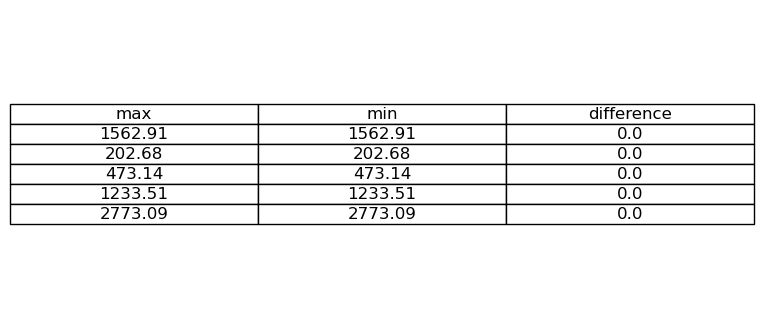

In [19]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size as needed

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=q3_outstanding_debt.head().values,
                 colLabels=q3_outstanding_debt.columns,
                 cellLoc='center',
                 loc='center')

# Adjust font size and formatting
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale the table

# Save the figure as a PNG file
plt.savefig('q3_outstanding_debt.png', bbox_inches='tight', dpi=300)

# Optionally, show the plot
plt.show()

Q1 to Q3 Report Analysis

In [20]:
# Count the occurrences of 'Yes' and 'No'
q1_count = q1['payment_of_min_amount'].value_counts()

# Display the counts
q1_num_yes = q1_count.get('Yes', 0)
q1_num_no = q1_count.get('No', 0)


In [21]:
# Count the occurrences of 'Yes' and 'No'
q2_count = q2['payment_of_min_amount'].value_counts()

# Display the counts
q2_num_yes = q2_count.get('Yes', 0)
q2_num_no = q2_count.get('No', 0)

In [22]:
# Count the occurrences of 'Yes' and 'No'
q3_count = q3['payment_of_min_amount'].value_counts()

# Display the counts
q3_num_yes = q3_count.get('Yes', 0)
q3_num_no = q3_count.get('No', 0)

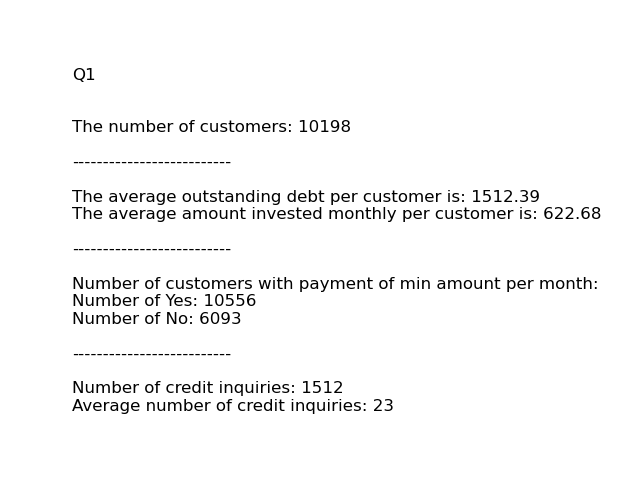

In [23]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Hide the axes
ax.axis('off')

# Prepare the text to be displayed
text = (
    "Q1\n\n\n"
    f"The number of customers: {q1['customer_id'].nunique()}\n\n"
     "--------------------------\n\n"
    f"The average outstanding debt per customer is: {round(q1['outstanding_debt'].mean(), 2)}\n"
    f"The average amount invested monthly per customer is: {round(q1['amount_invested_monthly'].mean(), 2)}\n\n"
    "--------------------------\n\n"
    "Number of customers with payment of min amount per month:\n"
    f"Number of Yes: {q1_num_yes}\n"
    f"Number of No: {q1_num_no}\n\n"
    "--------------------------\n\n"
    f"Number of credit inquiries: {int(q1['outstanding_debt'].mean())}\n"
    f"Average number of credit inquiries: {int(q1['num_credit_inquiries'].mean())}"
)

# Add text to the plot with left alignment
ax.text(0.1, 0.5, text, ha='left', va='center', fontsize=12, wrap=True)

# Save the figure as a PNG file
plt.savefig('q1_analysis.png', bbox_inches='tight', dpi=300)

# Optionally, show the plot
plt.show()


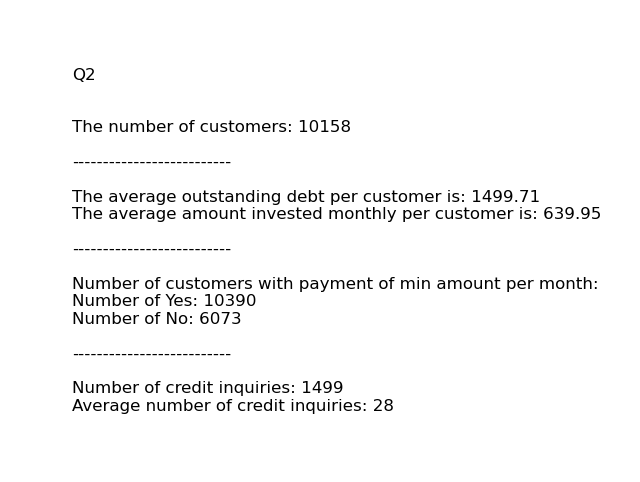

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

# Hide the axes
ax.axis('off')

# Prepare the text to be displayed
text = (
    "Q2\n\n\n"
    f"The number of customers: {q2['customer_id'].nunique()}\n\n"
     "--------------------------\n\n"
    f"The average outstanding debt per customer is: {round(q2['outstanding_debt'].mean(), 2)}\n"
    f"The average amount invested monthly per customer is: {round(q2['amount_invested_monthly'].mean(), 2)}\n\n"
    "--------------------------\n\n"
    "Number of customers with payment of min amount per month:\n"
    f"Number of Yes: {q2_num_yes}\n"
    f"Number of No: {q2_num_no}\n\n"
    "--------------------------\n\n"
    f"Number of credit inquiries: {int(q2['outstanding_debt'].mean())}\n"
    f"Average number of credit inquiries: {int(q2['num_credit_inquiries'].mean())}"
)

# Add text to the plot with left alignment
ax.text(0.1, 0.5, text, ha='left', va='center', fontsize=12, wrap=True)

# Save the figure as a PNG file
plt.savefig('q2_analysis.png', bbox_inches='tight', dpi=300)

# Optionally, show the plot
plt.show()

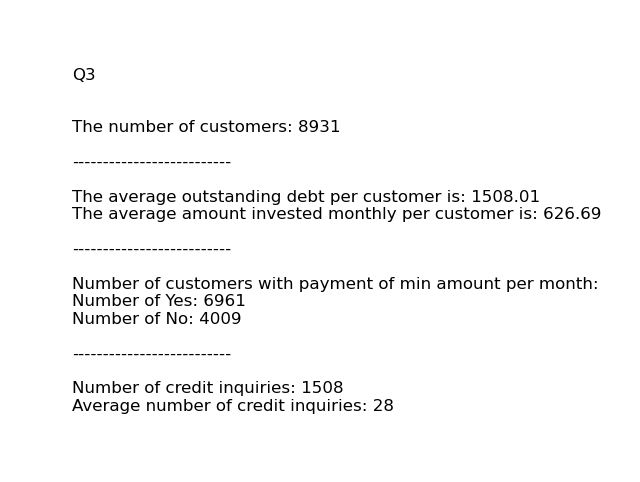

In [25]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Hide the axes
ax.axis('off')

# Prepare the text to be displayed
text = (
    "Q3\n\n\n"
    f"The number of customers: {q3['customer_id'].nunique()}\n\n"
     "--------------------------\n\n"
    f"The average outstanding debt per customer is: {round(q3['outstanding_debt'].mean(), 2)}\n"
    f"The average amount invested monthly per customer is: {round(q3['amount_invested_monthly'].mean(), 2)}\n\n"
    "--------------------------\n\n"
    "Number of customers with payment of min amount per month:\n"
    f"Number of Yes: {q3_num_yes}\n"
    f"Number of No: {q3_num_no}\n\n"
    "--------------------------\n\n"
    f"Number of credit inquiries: {int(q3['outstanding_debt'].mean())}\n"
    f"Average number of credit inquiries: {int(q3['num_credit_inquiries'].mean())}"
)

# Add text to the plot with left alignment
ax.text(0.1, 0.5, text, ha='left', va='center', fontsize=12, wrap=True)

# Save the figure as a PNG file
plt.savefig('q3_analysis.png', bbox_inches='tight', dpi=300)

# Optionally, show the plot
plt.show()
